<a href="https://colab.research.google.com/github/JavierBescosArtigas/MBID07Machie-Learning/blob/master/MBID07Pr2DengueSupervisado_Javier_Bescos_Artigas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aprendizaje supervisado

## Carga de datos

In [65]:
from IPython.display import Image #to show images in notebook
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [66]:
# carga de datos
import pandas as pd
import io
from google.colab import files
# manipulación y visualización
import matplotlib.pyplot as plt
import numpy as np
import itertools
import seaborn as sns
#random
from pprint import pprint

In [67]:
#train dataset
train_feat = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Colabs MBID/dengue_features_train.csv")
##display(train_feat.head()) 
display(train_feat.shape)

#labels dataset
train_labels = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Colabs MBID/dengue_labels_train.csv")
display(train_labels.head())

#test
test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Colabs MBID/dengue_features_test.csv")
##display(test.head())
display(test.shape)

#merging 
train = pd.merge(train_feat,train_labels,on=['city', 'year', 'weekofyear'])

display(train.describe())
#display(train.head())

(1456, 24)

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6


(416, 24)

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
count,1456.000000,1456.000000,1262.000000,1404.000000,1434.000000,1434.000000,1443.000000,1446.000000,1446.000000,1446.000000,...,1446.000000,1443.000000,1446.000000,1446.000000,1413.000000,1413.000000,1436.000000,1442.000000,1434.000000,1456.000000
mean,2001.031593,26.503434,0.142294,0.130553,0.203783,0.202305,45.760388,298.701852,299.225578,295.246356,...,82.161959,45.760388,16.746427,4.903754,27.185783,8.059328,32.452437,22.102150,39.326360,24.675137
std,5.408314,15.019437,0.140531,0.119999,0.073860,0.083903,43.715537,1.362420,1.261715,1.527810,...,7.153897,43.715537,1.542494,3.546445,1.292347,2.128568,1.959318,1.574066,47.455314,43.596000
min,1990.000000,1.000000,-0.406250,-0.456100,-0.015533,-0.063457,0.000000,294.635714,294.892857,289.642857,...,57.787143,0.000000,11.715714,1.357143,21.400000,4.528571,26.700000,14.700000,0.000000,0.000000
25%,1997.000000,13.750000,0.044950,0.049217,0.155087,0.144209,9.800000,297.658929,298.257143,294.118929,...,77.177143,9.800000,15.557143,2.328571,26.300000,6.514286,31.100000,21.100000,8.700000,5.000000
50%,2002.000000,26.500000,0.128817,0.121429,0.196050,0.189450,38.340000,298.646429,299.289286,295.640714,...,80.301429,38.340000,17.087143,2.857143,27.414286,7.300000,32.800000,22.200000,23.850000,12.000000
75%,2005.000000,39.250000,0.248483,0.216600,0.248846,0.246982,70.235000,299.833571,300.207143,296.460000,...,86.357857,70.235000,17.978214,7.625000,28.157143,9.566667,33.900000,23.300000,53.900000,28.000000
max,2010.000000,53.000000,0.508357,0.454429,0.538314,0.546017,390.600000,302.200000,302.928571,298.450000,...,98.610000,390.600000,20.461429,16.028571,30.800000,15.800000,42.200000,25.600000,543.300000,461.000000


## Preproceso
Aquí vamos a realizar diferentes procesos:

1. Vamos a hacer una observación rápida de la variable objetivo con respecto a la fecha, dado si se observa una tendencia temporal fuerte, quizás alteremos nuestro procediento, para poder hacer predicciones correctamente.
1. **Fill Foward** para eliminar NA's
1. Como estamos realizando aprendizaje **no-supervisado**, ya hemos unido (merging) labels & training into 1 df
1. Separación del dataset de entrenamiento en 80-20, correspondiendo a training-validation
1. Transformación de variables categóricas en numéricas para los distintos clasificadores, en resumen sólo sobre over -> city, **One-Hot Encoding / binarizador**. Binarizador, 1-hot se usa en redes neuronales
1. **Normalization** of data, using sklearn.preprocesing, pero no usaremos como estándar los datos normalizados para los modelos, sólo para aquellos que la literatura requiera.


### Observación rápida de la tendencia temporal

In [68]:
train.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


week_start_date    datetime64[ns]
total_cases                 int64
dtype: object

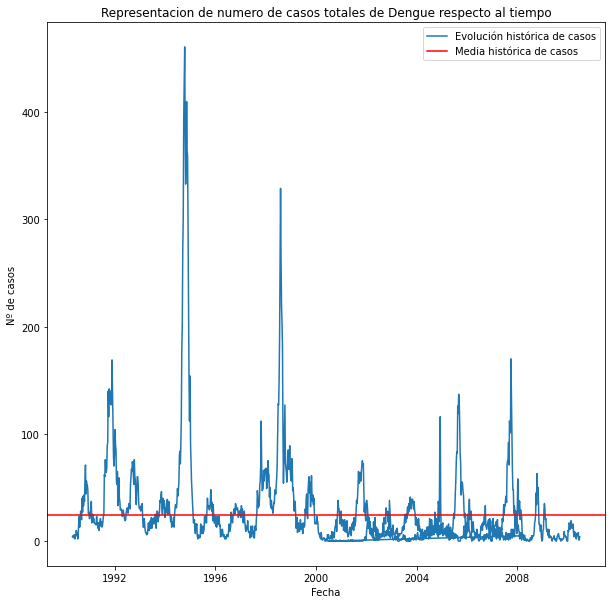

In [69]:
#sin quitar week-start-date:
timeseries = train[['week_start_date', 'total_cases']]
timeseries['week_start_date'] = pd.to_datetime(train.week_start_date)
display(timeseries.dtypes)
#timeseries.plot(style='k.')
plt.plot(timeseries.week_start_date,timeseries.total_cases, label='Evolución histórica de casos')
plt.axhline(y=timeseries.total_cases.mean(), color='red', label='Media histórica de casos')
plt.legend()
plt.rcParams["figure.figsize"] = (10,10)
plt.xlabel("Fecha")
plt.ylabel("Nº de casos")
plt.title("Representacion de numero de casos totales de Dengue respecto al tiempo")
plt.show()

Podemos observar que no existe ninguna tendencia aparente, por lo que vamos a eliminar la columna week-start-date.

### Eliminando columna/s innecesarias
* De primeras, según lo dicho anterirmente, no necesitamos *week_start_date*

In [70]:
try:
  train.drop("week_start_date", axis = 1, inplace = True)
  #test.drop("week_start_date", axis = 1, inplace = True)
except:
  print('Hay un error, puede que ya estuviera eliminada esa columna, ó que nunca existiera\n')
pprint(train.columns.values)

array(['city', 'year', 'weekofyear', 'ndvi_ne', 'ndvi_nw', 'ndvi_se',
       'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent',
       'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c',
       'station_max_temp_c', 'station_min_temp_c', 'station_precip_mm',
       'total_cases'], dtype=object)


### Fill foward
* Para eliminar NA's en los datos de entrenamiento y test

In [71]:
#Percentage of NA's in train and test
naTest = round(test.isnull().sum().sort_values(ascending = False)/test.shape[0]*100, 2)
"""
naTrain = round(train.isnull().sum().sort_values(ascending = False)/train.shape[0]*100, 2)
naTest = round(test.isnull().sum().sort_values(ascending = False)/test.shape[0]*100, 2)
print("% of NA's in train")
display(naTrain)
print("\n\n% of NA's in test")
display(naTest)
"""
#Ffill
train.fillna(method='ffill', inplace=True)
test.fillna(method='ffill', inplace=True)
#print("% of NA's in train")
display(round(train.isnull().sum().sort_values(ascending = False)/train.shape[0]*100, 2))
print("\n\n% of NA's in test")
display(round(test.isnull().sum().sort_values(ascending = False)/test.shape[0]*100, 2))

city                                     0.0
year                                     0.0
station_precip_mm                        0.0
station_min_temp_c                       0.0
station_max_temp_c                       0.0
station_diur_temp_rng_c                  0.0
station_avg_temp_c                       0.0
reanalysis_tdtr_k                        0.0
reanalysis_specific_humidity_g_per_kg    0.0
reanalysis_sat_precip_amt_mm             0.0
reanalysis_relative_humidity_percent     0.0
reanalysis_precip_amt_kg_per_m2          0.0
reanalysis_min_air_temp_k                0.0
reanalysis_max_air_temp_k                0.0
reanalysis_dew_point_temp_k              0.0
reanalysis_avg_temp_k                    0.0
reanalysis_air_temp_k                    0.0
precipitation_amt_mm                     0.0
ndvi_sw                                  0.0
ndvi_se                                  0.0
ndvi_nw                                  0.0
ndvi_ne                                  0.0
weekofyear



% of NA's in test


city                                     0.0
year                                     0.0
station_min_temp_c                       0.0
station_max_temp_c                       0.0
station_diur_temp_rng_c                  0.0
station_avg_temp_c                       0.0
reanalysis_tdtr_k                        0.0
reanalysis_specific_humidity_g_per_kg    0.0
reanalysis_sat_precip_amt_mm             0.0
reanalysis_relative_humidity_percent     0.0
reanalysis_precip_amt_kg_per_m2          0.0
reanalysis_min_air_temp_k                0.0
reanalysis_max_air_temp_k                0.0
reanalysis_dew_point_temp_k              0.0
reanalysis_avg_temp_k                    0.0
reanalysis_air_temp_k                    0.0
precipitation_amt_mm                     0.0
ndvi_sw                                  0.0
ndvi_se                                  0.0
ndvi_nw                                  0.0
ndvi_ne                                  0.0
week_start_date                          0.0
weekofyear

Ya no quedan NA's, pasamos a otra cosa.

### Separar el conjunto de entrenamiento en Train-Validation
* El conjunto de test se deja al margen, fácilmente diferenciable porque tiene 1 dimensión menos (no tiene las etiquetas, así que sólo tiene **22** dims).
* El conjunto de entrenamiento va a ser separado en 80-20
* Según este [link](https://towardsdatascience.com/how-to-split-data-into-three-sets-train-validation-and-test-and-why-e50d22d3e54c), si nos encontramos tratando con un dataset temporal, deberíamos tomar los últimos datos disponibles para el validation subset... no lo estoy aplicando entre otras razones porque, al observar el plot anterior vemos que no se observa una tendencia temporal.

In [72]:
#para splitear el dataset usaremos la librería de sklear, pese a su nombre, en este caso hay que recordar que separamos en validation-train
from sklearn.model_selection import train_test_split
#train_size=0.8
train_original = train
train, validation = train_test_split(train_original, train_size=0.8)

print(f"Porcentaje (sobre el total) original de datos de train:\n{round(100*train_original.shape[0]/(test.shape[0] + train_original.shape[0]), 2)} %" )

print(f"Porcentaje (sobre el total) validation:\n{round(100*validation.shape[0]/(test.shape[0] + train_original.shape[0]), 2)} %" )

print(f"Porcentaje (sobre el total) final de datos de train:\n{round(100*train.shape[0]/(test.shape[0] + train_original.shape[0]), 2)} %" )

print(f"Porcentaje (sobre el total) test:\n{round(100*test.shape[0]/(test.shape[0] + train_original.shape[0]), 2)} %" )

Porcentaje (sobre el total) original de datos de train:
77.78 %
Porcentaje (sobre el total) validation:
15.6 %
Porcentaje (sobre el total) final de datos de train:
62.18 %
Porcentaje (sobre el total) test:
22.22 %


### Binarizor
* Necesitamos saber qué features serán separadas, que corresponderán a las características consideradas como 'object'
* Luego vamos a binarizar, y eliminaremos las columnas categoricas´originales


In [73]:
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()

print(f"{train.dtypes}\nshape del dataset de entrenamiento {train.shape}")

train['city_bin'] = lb.fit_transform(train['city'])
validation['city_bin'] = lb.fit_transform(validation['city'])
#test['city_bin'] = lb.fit_transform(test['city'])

train_original['city_bin'] = lb.fit_transform(train_original['city'])

city                                      object
year                                       int64
weekofyear                                 int64
ndvi_ne                                  float64
ndvi_nw                                  float64
ndvi_se                                  float64
ndvi_sw                                  float64
precipitation_amt_mm                     float64
reanalysis_air_temp_k                    float64
reanalysis_avg_temp_k                    float64
reanalysis_dew_point_temp_k              float64
reanalysis_max_air_temp_k                float64
reanalysis_min_air_temp_k                float64
reanalysis_precip_amt_kg_per_m2          float64
reanalysis_relative_humidity_percent     float64
reanalysis_sat_precip_amt_mm             float64
reanalysis_specific_humidity_g_per_kg    float64
reanalysis_tdtr_k                        float64
station_avg_temp_c                       float64
station_diur_temp_rng_c                  float64
station_max_temp_c  

In [74]:
train.drop(columns=['city'], inplace=True)
validation.drop(columns=['city'], inplace=True)
#test.drop(columns=['city'], inplace=True)

train_original.drop(columns=['city'], inplace=True)
!echo "--------------------------------------------------"
display(train.dtypes)

--------------------------------------------------


year                                       int64
weekofyear                                 int64
ndvi_ne                                  float64
ndvi_nw                                  float64
ndvi_se                                  float64
ndvi_sw                                  float64
precipitation_amt_mm                     float64
reanalysis_air_temp_k                    float64
reanalysis_avg_temp_k                    float64
reanalysis_dew_point_temp_k              float64
reanalysis_max_air_temp_k                float64
reanalysis_min_air_temp_k                float64
reanalysis_precip_amt_kg_per_m2          float64
reanalysis_relative_humidity_percent     float64
reanalysis_sat_precip_amt_mm             float64
reanalysis_specific_humidity_g_per_kg    float64
reanalysis_tdtr_k                        float64
station_avg_temp_c                       float64
station_diur_temp_rng_c                  float64
station_max_temp_c                       float64
station_min_temp_c  

Estaba pensando si debería categorizar cosas como weekofyear (que viene a ser una categoría como si fueran dias de la semana),
 o incluso years pero creo que da igual porque al fin y al cabo luego voy a normalizar las variables así que el posible sesgo debido a que
  estas variables categóricas no sean tratadas como tal (porque no se les ha aplicado el 1-hot-encoding), debería dar igual, corríjanme si no.

### Normalization
* Muchos estimadores y modelos no funcioan correctamente si las variables no se asemejan a una gausiana así que voy a preprocesar de forma estándar usando una libreria de *sklearn*
* A priori no voy a efectuar ninguna normalizacion´sobre el dataset train_original(el cual corresponde a no haber separado en train y validation)

In [75]:
from sklearn import preprocessing

In [77]:
#Como seguimiento mostremos sus dimensiones, test debería tener 1 menos ya que no incluye labels
print(train.shape)
print(validation.shape)
print(test.shape)

#train
scaler = preprocessing.StandardScaler().fit(train)
train_scaled = scaler.transform(train)
#validation
scaler = preprocessing.StandardScaler().fit(validation)
validation_scaled = scaler.transform(validation)
print(f"Train: {type(train_scaled)}, validation: {type(validation_scaled)}")

(1164, 24)
(292, 24)
(416, 24)
Train: <class 'numpy.ndarray'>, validation: <class 'numpy.ndarray'>


In [78]:
# otra forma sería scalar entre 0 y 1
from sklearn.preprocessing import MinMaxScaler
# performin min-max scaling each continuous feature column to the range [0, 1]
scaler = MinMaxScaler()
train_scaled2 = scaler.fit_transform(train)
validation_scaled2 = scaler.fit_transform(validation)
print(f"Train_scaled2 type ->  {type(train_scaled2)}, validation_scaled2 type -> {type(validation_scaled2)}")

Train <class 'numpy.ndarray'>, validation <class 'numpy.ndarray'>


## Decision-tree como primer modelo Y para la seleccion de variables
Empezamos por plantear un decision-tree con todas nuestras variables.
Esperamos que caiga en el sobre-ajuste y luego pasaremos otros modelos regresivos como random-forest o KNN con el que mejorar nuestra prediccion:
* Tomaremos como hiperparámetro de profundidad para el primer modelo rapido: 3 
* Luego, utilizaremos resultados asociados al decision-tree para hacernos una idea de las mejores variables a considerar.

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  "X does not have valid feature names, but"


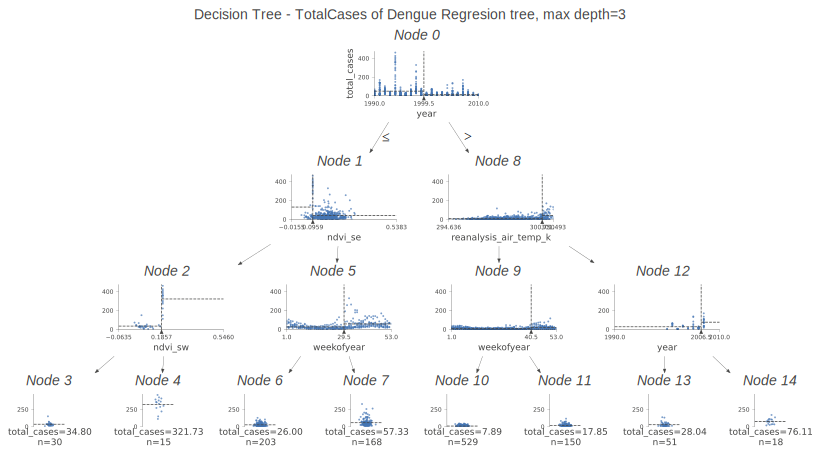

In [79]:
!pip install dtreeviz > /dev/null

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from dtreeviz.trees import *

# prepare the data
x_train = train[[columna for columna  in train.columns if columna != "total_cases"]]
y_train = train["total_cases"]
columnasSelected = [columna for columna  in train.columns if columna != "total_cases"]

# fir the regressor
reg = tree.DecisionTreeRegressor(random_state=42, max_depth=3) #max depth is related to nº of groups, 3 5 or 7
reg = reg.fit(x_train, y_train)

# plot the tree
viz = dtreeviz(reg,
               x_data=x_train,
               y_data=y_train,
               target_name='total_cases', #not in array of features
               feature_names = columnasSelected, #array of features
               title="Decision Tree - TotalCases of Dengue Regresion tree, max depth=3",
               show_node_labels = True)
viz


Vemos que, como ya sabíamos acerca de este tipo de modelos, rápidamente se vuelven gráficamente incomprensibles. En cualquier caso:
* Dado que nuestro problema es de **regresión** vamos a obtener el modelo sin "capar" la profundidad del árbol
* Luego vamos a obtener la *accuraccy* sobre el dataset de validación, esperamos que sea baja debido al sobre-ajuste ú *overfitting* debido al usar tantas variables.


In [80]:
from sklearn import metrics

#lets go with the prediction
validationTree = pd.get_dummies(validation) #forgot to do before
x_validation = validationTree[[columna for columna  in validationTree.columns if columna != "total_cases"]]
y_validation = validation["total_cases"]
#1-hot encoding test
y_pred = reg.predict(x_validation)
#antes de calcular la accuracy, necesitamos pasar ambas variables a la misma clase, ahora no lo son:
print(type(y_validation))
print(y_validation.shape)
print(type(y_pred))
print(y_pred.shape)

<class 'pandas.core.series.Series'>
(292,)
<class 'numpy.ndarray'>
(292,)


In [81]:
y_validation = y_validation.to_numpy()
print(y_validation[:10])
print(y_pred[:10])

[66  1 10 42  3  9  0  3 36  6]
[57.33333333 17.84666667  7.89224953 57.33333333  7.89224953 17.84666667
  7.89224953  7.89224953 57.33333333  7.89224953]


In [82]:
# Cómo de bueno es el modelo? Dado que es un problema de regresión, la documentación recomienda r2_scofer
from sklearn.metrics import r2_score
print("r2 :",round(r2_score(y_validation, y_pred),3))
print("r2 variance_weighted",round(r2_score(y_validation, y_pred, multioutput='variance_weighted'),3))
print("r2 uniform_average",round(r2_score(y_validation, y_pred, multioutput='uniform_average'),3))


r2 : 0.288
r2 variance_weighted 0.288
r2 uniform_average 0.288


* Vemos que el modelo es muy malo, la comparación entre los valores que tenemos etiquetados **y** no han sido utilizados en el entrenamiento (los de validación), con lo predicho para sus features es muy dispar.

* No estamos optimizando hiperparámetros ni nada, pero ésto sirve como motivación para pasar a un RandomForest, que esperemos que se comporte mejor.
* Vamos a optimizar hiperparametros, en este caso la *profundidad* utilizando como medida el **mean average error (mae)**
* Una vez descubierto el mejor hiper-parametro, analizaremos la importancia de las diferentes variables que tenemos y descartaremos algunas.


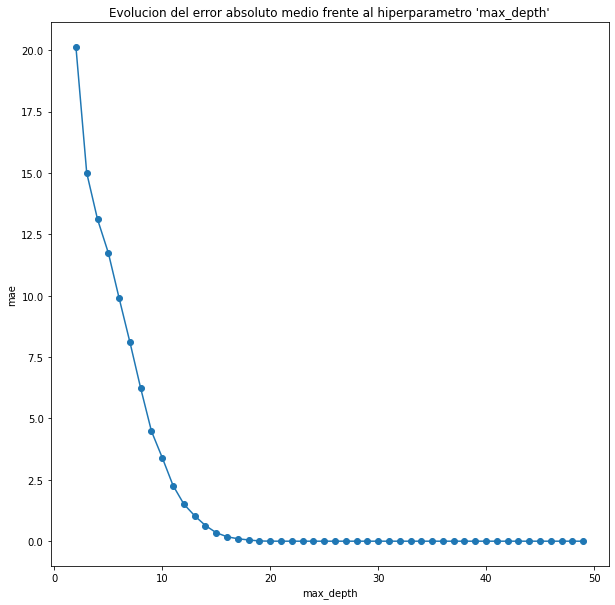

In [83]:
# Compute the max 
mae = []
x_train = train[[columna for columna  in train.columns if columna != "total_cases"]]
y_train = train["total_cases"]
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
for i in range(2, 50):
    regressor = DecisionTreeRegressor(max_depth=i)
    regressor.fit(x_train, y_train)
    pred_values = regressor.predict(x_train)
    maev = mean_absolute_error(y_train,pred_values)
    mae.append(maev)
    
# Plot mae   
plt.plot(range(2,50), mae, marker='o')
plt.xlabel('max_depth')
plt.ylabel('mae')
plt.title("Evolucion del error absoluto medio frente al hiperparametro 'max_depth'")
plt.show()
#print(mae)

In [84]:
#Aqui´ obtenemos una metrica´por variable de la importancia relativa a la hora del modelo utilizando max_depth=10
features = [columna for columna  in train_original.columns if columna != "total_cases"]
regressor = DecisionTreeRegressor(max_depth=10) # hipervalor tomando al observar el grafico´anterior
regressor.fit(train_original[[columna for columna  in train_original.columns if columna != "total_cases"]], train_original['total_cases'])

print ('Feature Relevances')
pd.DataFrame({'Attributes': features ,
              'Decision Tree importance %': np.around(regressor.feature_importances_ *100, 3)}).sort_values('Decision Tree importance %', ascending=False)

Feature Relevances


,Attributes,Decision Tree importance %
4,ndvi_se,43.350
0,year,20.486
1,weekofyear,11.840
7,reanalysis_air_temp_k,3.925
15,reanalysis_specific_humidity_g_per_kg,3.090
21,station_precip_mm,2.533
17,station_avg_temp_c,2.247
18,station_diur_temp_rng_c,1.881
5,ndvi_sw,1.553
8,reanalysis_avg_temp_k,1.535


Ahora, una vez definido el valor de profundidad, vamos a hacer un rapido modelo con *train-validacion* para ver graficamente el comportamiento:

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3249: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if (await self.run_code(code, result,  async_=asy)):


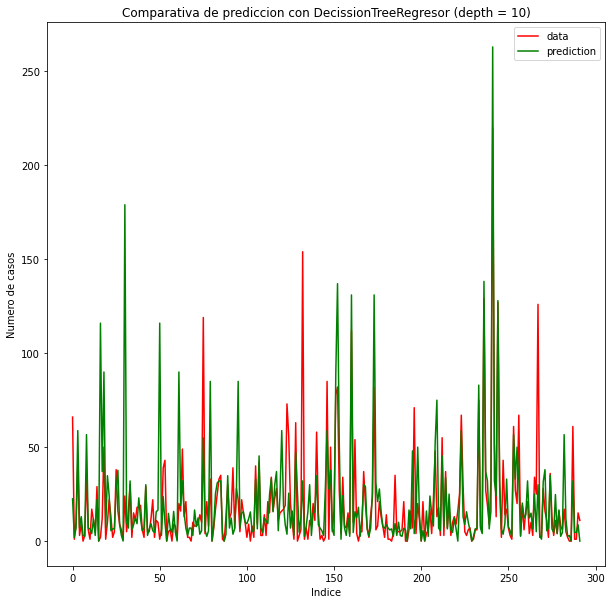

mae = 11.618164481881289


In [85]:
from sklearn.metrics import mean_absolute_error
#y predict
regressor = DecisionTreeRegressor(max_depth=10)
regressor.fit(train[[columna for columna  in train.columns if columna != "total_cases"]], train['total_cases'])
y_pred = regressor.predict(X = validation.drop(['total_cases'], axis = 1))


# x axis for plotting
import numpy as np
xx = np.stack(i for i in range(validation['total_cases'].shape[0]))
plt.plot(xx, validation['total_cases'], c='r', label='data')
#plt.plot(xx, y, c='k', label='data')
plt.plot(xx, y_pred, c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.ylabel("Numero de casos")
plt.xlabel("Indice")
max_depth=10; plt.title("Comparativa de prediccion con DecissionTreeRegresor (depth = %i)" % max_depth) #10 segun imagen anterior

plt.show()
print(f"mae = {mean_absolute_error(validation['total_cases'], y_pred)}" )

maeDecision_tree = mean_absolute_error(validation['total_cases'], y_pred)

### Para concluir esta seccion


Hemos utilizado un decision tree sobre el cual hemos optimizado el hiperparametro´ *max_depth* para discernir la importancia de las variables a utilizar en el modelo.
* Hemos observado que un arbol de decision falla en captar los bajos valores y rependinos crecimientos de nuestro dataset
* Nos quedaremos conn todas ellas cuya importancia % sea mayor que 1% segun´la metrica anterior.
* Tambien vamos a crear una lista de features con importancia mayor del 5% para modelos muy dependientes del nº de variables como KNN

In [86]:
selectedFeaturesDF = pd.DataFrame({'Attributes': features ,
              'Decision Tree importance %': np.around(regressor.feature_importances_ *100, 3)})
selectedFeaturesDF[selectedFeaturesDF['Decision Tree importance %'] > 1.0 ]
selectedFeatures = selectedFeaturesDF[selectedFeaturesDF['Decision Tree importance %'] > 1.0 ].Attributes
selectedFeatures= np.array(selectedFeatures)


In [87]:
selectedFeaturesDF5 = pd.DataFrame({'Attributes': features ,
              'Decision Tree importance %': np.around(regressor.feature_importances_ *100, 3)})
selectedFeaturesDF5[selectedFeaturesDF['Decision Tree importance %'] > 1.0 ]
selectedFeatures5 = selectedFeaturesDF5[selectedFeaturesDF5['Decision Tree importance %'] > 5.0 ].Attributes
selectedFeatures5 = np.array(selectedFeatures5)

## Modelado y comparacion 
Ahora, tras haber encontrado una serie de *features* con las que trabajar, asi como un primer modelo, pasamos a realizar una serie de modelos, para los cuales mediremos la efectividad a partir de *cross-validation*, utilizando sobre todos la misma metrica (**mae**, seguramente) de tal manera que a la hora de efectuar la prediccion final para entregar, nos quedaremos con el que mejor resultado.
* Empezaremos, a proposito de haber utilizado un arbol de decision para seleccionar features, con **Random Forest**


In [88]:
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

## KNN regresion
Que esperar:

* KNN funciona mal con muchas variables, ya que las funciones de dsitancia multidimensionales son demasiado dependientes de pequeñas variabilidades en 1 sola variable, asi que se trabajara solo con las *selected features* obtenidas de aplicar un *arbol de decision*.
* Siguiendo/copiando el ejemplo del profesor se probara tanto con funcion de peso *uniforme* como *distancia*
* Optimizacion de hiperparametros rapida, el rango maximo de *n_neightbours* se adapta al problema en cuestion usando como valor maximo el metodo de freidman diaconis,
* Cross validation

### Optimizacion de hiperparametros
* Tipo de peso, distancia o estandar
* Nº de vecinos a considerar

In [89]:
#display(np.append(selectedFeatures, "total_cases"), selectedFeatures); # np.append not in-place
from sklearn import neighbors
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
import numpy as np
#Cross-validation inicializacion
cv = KFold(n_splits = 5, shuffle = False) #5 parece adecuado para un dataset tan pequeño como el nuestro, incluso 3

#Como hemos comentado, vamos a usar solo las selected features, no usamos nuestro split en train-val porque el codigo
## que usamos ya lo hace.
#Fijarse que se esta utilizando el conjunto de trainTotal, no separado en train-validacion, esto es porque solo queremos optimizar hiperparam, para
## el test final de KNN si que se usara la separacion indicada
trainKNN = train_original[np.append(selectedFeatures, "total_cases")] #with tarjet feature
trainKNN.reset_index(drop = True, inplace = True)


display(trainKNN.head())

,year,weekofyear,ndvi_se,ndvi_sw,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_specific_humidity_g_per_kg,station_avg_temp_c,station_min_temp_c,total_cases
0,1990,18,0.198483,0.177617,297.572857,297.742857,14.012857,25.442857,20.0,4
1,1990,19,0.162357,0.155486,298.211429,298.442857,15.372857,26.714286,22.2,5
2,1990,20,0.157200,0.170843,298.781429,298.878571,16.848571,26.714286,22.8,4
3,1990,21,0.227557,0.235886,298.987143,299.228571,16.672857,27.471429,23.3,3
4,1990,22,0.251200,0.247340,299.518571,299.664286,17.210000,28.942857,23.9,6


Min Value uniform : 19.16972635403547 (49)
Min Value distance : 19.206785884940807 (49)


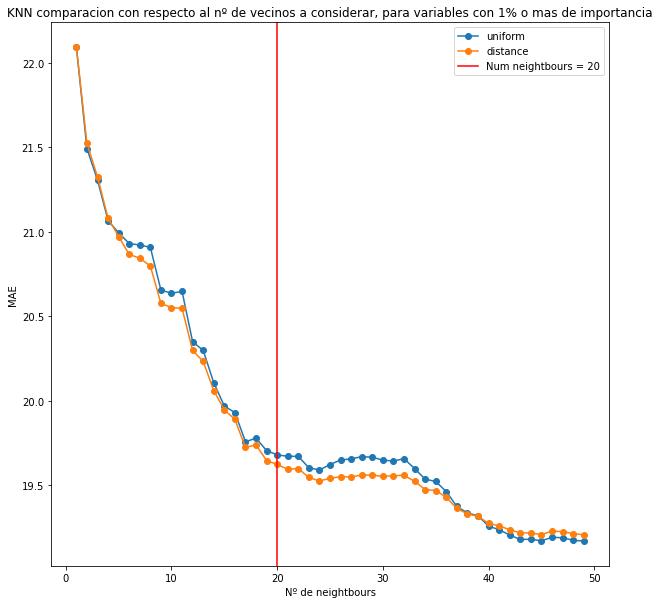

In [90]:
for i, weights in enumerate(['uniform', 'distance']):
   total_scores = []
   for n_neighbors in range(1,50):#antes era hasta 50, la raya roja no tiene sentido # lo aumento, dado que el calculo es relativamente rapido a mayor kneightbours 
       fold_accuracy = []
       knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
       # verificar cada uno de los modelos con validación cruzada.
       for train_fold, test_fold in cv.split(trainKNN):
          # División train test aleatoria
          f_train = trainKNN.loc[train_fold]
          f_test = trainKNN.loc[test_fold]
          # entrenamiento y ejecución del modelo
          knn.fit( X = f_train.drop(['total_cases'], axis=1), 
                               y = f_train['total_cases'])
          y_pred = knn.predict(X = f_test.drop(['total_cases'], axis = 1))
          # evaluación del modelo
          mae = mean_absolute_error(f_test['total_cases'], y_pred)
          fold_accuracy.append(mae)
       total_scores.append(sum(fold_accuracy)/len(fold_accuracy))
   
   plt.plot(range(1,len(total_scores)+1), total_scores, 
             marker='o', label=weights)
   print ('Min Value ' +  weights + " : " +  str(min(total_scores)) +" (" + str(np.argmin(total_scores) + 1) + ")")
   plt.ylabel('MAE')
   plt.xlabel('Nº de neightbours')      
   
plt.axvline(x=20, color='red', label='Num neightbours = 20')
plt.legend()
plt.title("KNN comparacion con respecto al nº de vecinos a considerar, para variables con 1% o mas de importancia")
plt.show() 


quizas son demasiadas variables, asi que quedemonos solo con las que tengan un 5% o mas de importancia

In [91]:
trainKNN = train_original[np.append(selectedFeatures5, "total_cases")] #with tarjet feature
trainKNN.reset_index(drop = True, inplace = True)
display(trainKNN.head())

,year,weekofyear,ndvi_se,ndvi_sw,total_cases
0,1990,18,0.198483,0.177617,4
1,1990,19,0.162357,0.155486,5
2,1990,20,0.157200,0.170843,4
3,1990,21,0.227557,0.235886,3
4,1990,22,0.251200,0.247340,6


Min Value uniform : 20.349816938496907 (49)
Min Value distance : 21.19522969796107 (49)


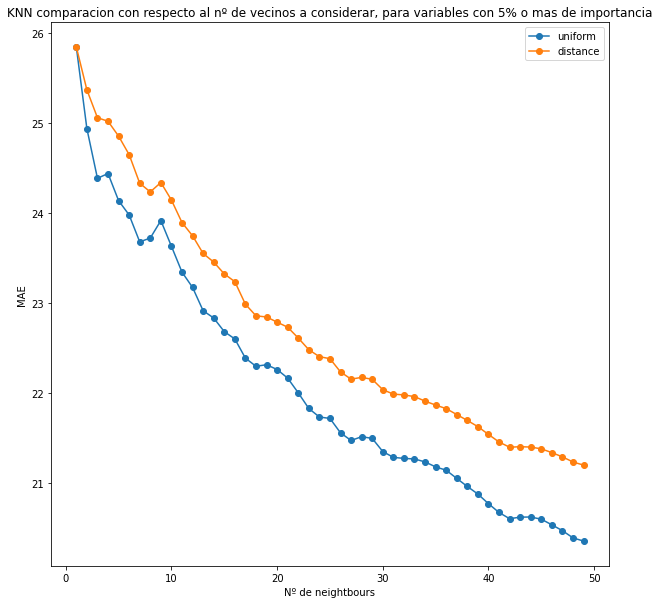

In [92]:
# Lo mismo que antes pero con menos variables
for i, weights in enumerate(['uniform', 'distance']):
   total_scores = []
   for n_neighbors in range(1,50):#antes era hasta 50, la raya roja no tiene sentido # lo aumento, dado que el calculo es relativamente rapido a mayor kneightbours 
       fold_accuracy = []
       knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
       # verificar cada uno de los modelos con validación cruzada.
       for train_fold, test_fold in cv.split(trainKNN):
          # División train test aleatoria
          f_train = trainKNN.loc[train_fold]
          f_test = trainKNN.loc[test_fold]
          # entrenamiento y ejecución del modelo
          knn.fit( X = f_train.drop(['total_cases'], axis=1), 
                               y = f_train['total_cases'])
          y_pred = knn.predict(X = f_test.drop(['total_cases'], axis = 1))
          # evaluación del modelo
          mae = mean_absolute_error(f_test['total_cases'], y_pred)
          fold_accuracy.append(mae)
       total_scores.append(sum(fold_accuracy)/len(fold_accuracy))
   
   plt.plot(range(1,len(total_scores)+1), total_scores, 
             marker='o', label=weights)
   print ('Min Value ' +  weights + " : " +  str(min(total_scores)) +" (" + str(np.argmin(total_scores) + 1) + ")")
   plt.ylabel('MAE')
   plt.xlabel('Nº de neightbours')      
   
plt.title("KNN comparacion con respecto al nº de vecinos a considerar, para variables con 5% o mas de importancia")
plt.legend()

plt.show() 


### Modelado
Visto lo visto, lo mejor que podemos utilizar para nuestro modelo de knn es:
* Usando las selectedFeatures con importancia > 1%, pese a ser mas variables parece comportarse mejor.
* 'Distance' como *weight* del algoritmo
* 20 Neightbours para el algoritmo
Ahora bien, para el modelo "final", y poder obtener una **mae**, necesitamos un trainDataset y un testDataset etiquetado.

Por tanto vamos a usar el split en dataset de 'train' y de 'validacion', porque a diferencia del caso anterior NO queremos optimizar hiperparametros sino obtener una medida de eficacia del modelo.
Notar que aunque en el codigo reutilicemos el nombre *trainKNN*, es diferente al apartado anterior. En el caso de lo que corresponde al testDataset **si** es evidente que es el de validacion. 

In [93]:
trainKNN = train[np.append(selectedFeatures, "total_cases")] #with tarjet feature
trainKNN.reset_index(drop = True, inplace = True)
validationKNN = validation[np.append(selectedFeatures, "total_cases")] #with tarjet feature
validationKNN.reset_index(drop = True, inplace = True)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3249: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if (await self.run_code(code, result,  async_=asy)):


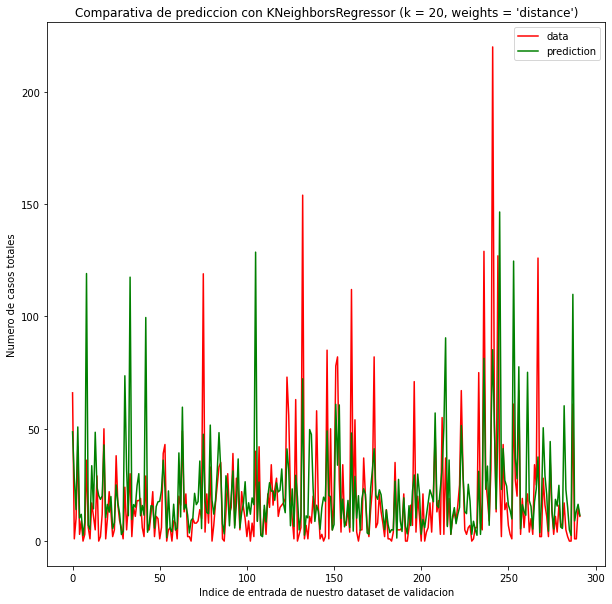

MAE 13.415656253261858


In [94]:
# constructor
n_neighbors = 20
weights = 'distance'
knn = neighbors.KNeighborsRegressor(n_neighbors= 20, weights='distance') 
# fit and predict

knn.fit( X = trainKNN.drop(['total_cases'], axis=1), y = trainKNN['total_cases'])
y_pred = knn.predict(X = validationKNN.drop(['total_cases'], axis = 1))
mae = mean_absolute_error(validationKNN['total_cases'], y_pred)

#Ploteo
from sklearn.metrics import mean_absolute_error

                    
# x axis for plotting
import numpy as np
xx = np.stack(i for i in range(validationKNN['total_cases'].shape[0]))
plt.plot(xx, validationKNN['total_cases'], c='r', label='data')
#plt.plot(xx, y, c='k', label='data')
plt.plot(xx, y_pred, c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.title("Comparativa de prediccion con KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors,
                                                                weights))
plt.ylabel("Numero de casos totales")
plt.xlabel("Indice de entrada de nuestro dataset de validacion")
plt.show()
print ('MAE', mae)
mae_KNN = mae

### Conclusiones de knn
Fijandonos en su MAE, mayor que la obtenida con nuestro arbol de decision; concluimos que el modelo regresiv basado en KNN no es muy bueno para este problema.

Fijandonos visualmente queda claro que el mayor problema de este modelo es la imposibilidad de 'seguir' los grandes cambios en ciertas epocas de nuestro dataset. En cambio, intuitivamente parece que podria llegar a predecir mejor que el arbol de decision en situaciones no-atipicas; en cualquier caso, es deseable ser capaz de modelizar cuando ocurren 'grandes brotes de DENGUE' asi que, aunque fuera el caso, sigue siendo mucho peor que nuestro "simple" arbol de decision.

## Random Forest
Utilizar varios árboles, tomando un conjunto aleatorio de variables del total.

Individualmente son peores árboles que 1 sólo pero en grupo evitan el overfitting.

Según las clases teóricas, una buena consideración incial para los hiperparámetros sería: 
* Profundidad indefinida
* $Nº\ de\ árboles$ = $\sqrt{Nº\ variables}$


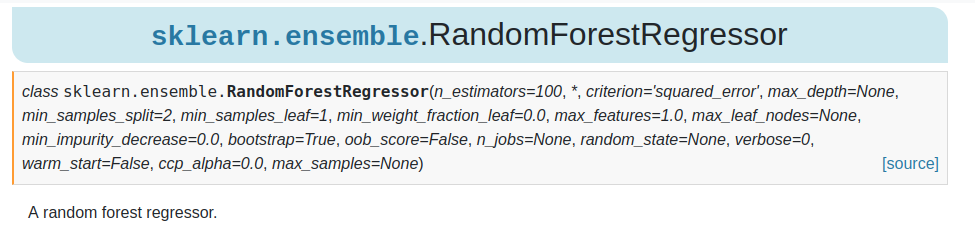

In [95]:
from IPython.display import Image
Image(filename='/content/drive/MyDrive/Colab Notebooks/Colabs MBID/imagesForColabs/randomForestscity.png') 


### Optimizacion de hiperparametros
Al igual que en la seccion anterior, usaremos el dataset **train_original** para descubrir cuales son los mejores hiperparametros. Luego obtendremos un modelo y una **MAE** como medida de bondad con el split train-validation, que es el mismo split para TODOS los modelos que en, la seccion final compararemos, y de entre los cuales elegiremos 1 para calcular una prediccion sobre el set (sin la feature objetivo) **test** y entregaremos el .csv a la competicion; y con el dinero del premio me retirare a Costa Rica y no volvere a trabajar

Por la naturaleza del algoritmo "Random-forest", voy a realizar 2 modelos:
* Usando unicamente las **selectedFeatures**
* Utilizando todas las features
Ello implica 2 optimizaciones de hiperparametros, que quizas coincidan, quizas no.

In [96]:
train_original.columns

Index(['year', 'weekofyear', 'ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw',
       'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'total_cases', 'city_bin'],
      dtype='object')

In [97]:
#Datasets con selected y todas las features para la optimizacion
trainRFselected = train_original[np.append(selectedFeatures, "total_cases")] #trainRandomForestselected features 
trainRFselected.reset_index(drop = True, inplace = True)

trainRFall = train_original #trainRandomForestall features 
trainRFall.reset_index(drop = True, inplace = True) 


**Selected** features only hiperpar opt.

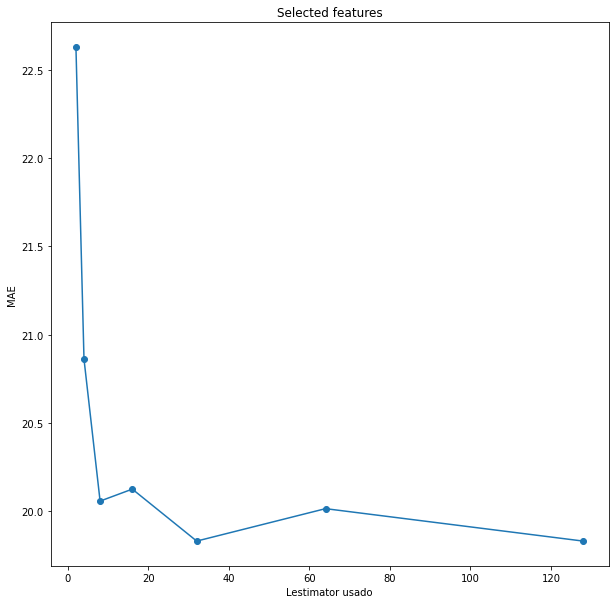

MAE 8.70030605670103


In [98]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
import numpy as np

l_estimators = [2, 4, 8, 16, 32, 64, 128]#, 256, 512, 1024] # probamos con mas opciones

cv = KFold(n_splits = 5, shuffle = False) #5 folds parece suficiente

total_scores = []
for estimators in l_estimators:
   fold_accuracy = []
   regressor =  RandomForestRegressor(n_estimators= estimators, 
                  criterion='absolute_error', random_state=0)
   
   #Recordar que al igual que en KNN, no estamos haciendo un split por serie temporal sino kfolds
   for train_fold, test_fold in cv.split(trainRFselected):
      # División train test aleatoria
      f_train = trainRFselected.loc[train_fold]
      f_test = trainRFselected.loc[test_fold]
      # entrenamiento y ejecución del modelo
      regressor.fit( X = f_train.drop(['total_cases'], axis=1), 
                           y = f_train['total_cases'])
      y_pred = regressor.predict(X = f_test.drop(['total_cases'], axis = 1))
      # evaluación del modelo
      mae = mean_absolute_error(f_test['total_cases'], y_pred)
      fold_accuracy.append(mae)
   total_scores.append(sum(fold_accuracy)/len(fold_accuracy))


plt.plot(l_estimators, total_scores, marker='o', label="Selected features")
plt.xlabel('Lestimator usado')
plt.ylabel('MAE')  
plt.title("Selected features")    
plt.show() 
print ('MAE', mae)


In [99]:
best_estSelected = l_estimators[np.argmin(total_scores)]
best_maeSelected = min(total_scores)
print ("Min Value (estimators = %i, MAE = %6.2f)"  % (best_estSelected, best_maeSelected))

Min Value (estimators = 128, MAE =  19.83)


**All** features only hiperpar opt.

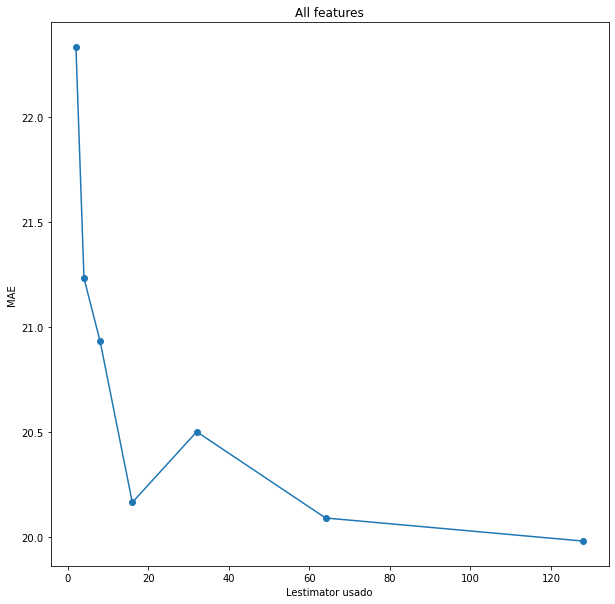

MAE 9.020081615120274


In [100]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
import numpy as np

l_estimators = [2, 4, 8, 16, 32, 64, 128]#, 256, 512, 1024] # probamos con mas opciones
cv = KFold(n_splits = 5, shuffle = False) #5 folds parece suficiente

total_scores = []
for estimators in l_estimators:
   fold_accuracy = []
   regressor =  RandomForestRegressor(n_estimators= estimators, 
                  criterion='absolute_error', random_state=0)
   
   #Recordar que al igual que en KNN, no estamos haciendo un split por serie temporal sino kfolds
   for train_fold, test_fold in cv.split(trainRFall):
      # División train test aleatoria
      f_train = trainRFall.loc[train_fold]
      f_test = trainRFall.loc[test_fold]
      # entrenamiento y ejecución del modelo
      regressor.fit( X = f_train.drop(['total_cases'], axis=1), 
                           y = f_train['total_cases'])
      y_pred = regressor.predict(X = f_test.drop(['total_cases'], axis = 1))
      # evaluación del modelo
      mae = mean_absolute_error(f_test['total_cases'], y_pred)
      fold_accuracy.append(mae)
   total_scores.append(sum(fold_accuracy)/len(fold_accuracy))


plt.plot(l_estimators, total_scores, marker='o', label="All features")
plt.xlabel('Lestimator usado')
plt.ylabel('MAE')      
plt.title("All features")    
plt.show()

print ('MAE', mae)

In [101]:
best_est = l_estimators[np.argmin(total_scores)]
best_mae = min(total_scores)
print ("Min Value (estimators = %i, MAE = %6.2f)"  % (best_est, best_mae))

Min Value (estimators = 128, MAE =  19.98)


prueba ploteo doble

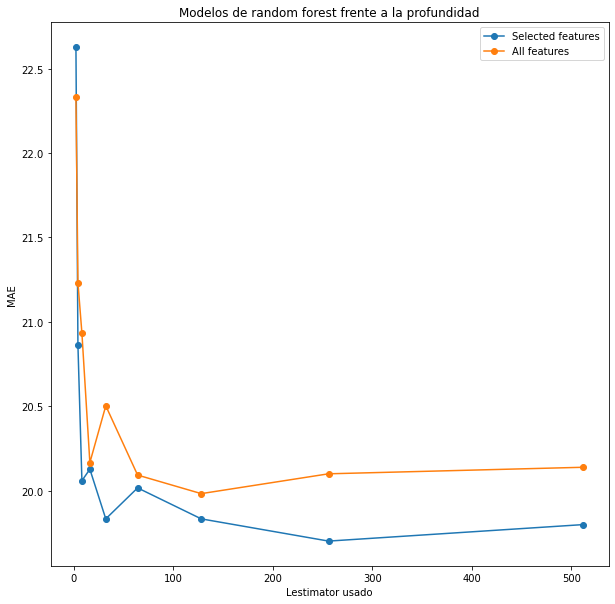

In [102]:
#selected
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
import numpy as np

l_estimators = [2, 4, 8, 16, 32, 64, 128, 256, 512,]# 1024] # probamos con mas opciones

cv = KFold(n_splits = 5, shuffle = False) #5 folds parece suficiente

total_scores = []
for estimators in l_estimators:
   fold_accuracy = []
   regressor =  RandomForestRegressor(n_estimators= estimators, 
                  criterion='absolute_error', random_state=0)
   
   #Recordar que al igual que en KNN, no estamos haciendo un split por serie temporal sino kfolds
   for train_fold, test_fold in cv.split(trainRFselected):
      # División train test aleatoria
      f_train = trainRFselected.loc[train_fold]
      f_test = trainRFselected.loc[test_fold]
      # entrenamiento y ejecución del modelo
      regressor.fit( X = f_train.drop(['total_cases'], axis=1), 
                           y = f_train['total_cases'])
      y_pred = regressor.predict(X = f_test.drop(['total_cases'], axis = 1))
      # evaluación del modelo
      maeSelected = mean_absolute_error(f_test['total_cases'], y_pred)
      fold_accuracy.append(maeSelected)
   total_scores.append(sum(fold_accuracy)/len(fold_accuracy))


plt.plot(l_estimators, total_scores, marker='o', label="Selected features")
plt.xlabel('Lestimator usado')
plt.ylabel('MAE')  

#all features
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
import numpy as np

cv = KFold(n_splits = 5, shuffle = False) #5 folds parece suficiente

total_scores = []
for estimators in l_estimators:
   fold_accuracy = []
   regressor =  RandomForestRegressor(n_estimators= estimators, 
                  criterion='absolute_error', random_state=0)
   
   #Recordar que al igual que en KNN, no estamos haciendo un split por serie temporal sino kfolds
   for train_fold, test_fold in cv.split(trainRFall):
      # División train test aleatoria
      f_train = trainRFall.loc[train_fold]
      f_test = trainRFall.loc[test_fold]
      # entrenamiento y ejecución del modelo
      regressor.fit( X = f_train.drop(['total_cases'], axis=1), 
                           y = f_train['total_cases'])
      y_pred = regressor.predict(X = f_test.drop(['total_cases'], axis = 1))
      # evaluación del modelo
      maeAll = mean_absolute_error(f_test['total_cases'], y_pred)
      fold_accuracy.append(maeAll)
   total_scores.append(sum(fold_accuracy)/len(fold_accuracy))


plt.plot(l_estimators, total_scores, marker='o', label="All features")
plt.xlabel('Lestimator usado')
plt.ylabel('MAE')      
plt.legend()    
plt.title("Modelos de random forest frente a la profundidad")
#show both & print both mae's

plt.show()
#print(f"Mae from selected-features model: {maeSelected}")
#print(f"Mae from all-features model: {maeAll}")

Vamos a realizar una ultima exploracion para valores altos del nº de arboles en el bosque. A partir de alli eligiremos el mejor modelo

### Modelado
Hay varios criterios a considerar:
 El mejor modelo parece ser el correspondiente a 128 de l_estimator y usando todas las features. Pero notamos un fuerte cambio de tendencia a la hora de llegar a l= 16, donde ademas parece ser que se comporta mejor el dataset con menos variables.

Vamos a considerar este segundo caso, lestimator = 128 y dataset = SelectedFeatures, como el optimo porque:
* La mejoria es minima al pasar de un 128, a uno alto como 128
* Computacionalmente es muchisimo mas lento considerar grandes l_estimators, lo cual es un problema a corto plazo dado que una vez calculado el modelo, predecir es mucho mas rapido. 
* Utilizando todas las features, a partir de 128 podemos observar que la MAE empeora, por tanto esta ocurriendo over-fitting, asi que, aunque con el dataset parcial no lo parece, dado que la mejoria de considerar mayores l_estimator es muy pequeña, uso esta
* Si requierieramos de hacer un fine-tunning de hiperparametros en los que la diferencia de **mae** de la que estamos hablando sea importante, recurririamos a un grid scan o similar, pero nuestro objetivo ahora es comparar RandomForest regresion con KNNregresion con DecisionTree regresion.

* El mejor modelo parece ser el que corresponde a considerar las´**selected features**
* Al igual que en secciones anteriores, vamos a utilizar el split train-validation

In [103]:
## With all features
#trainRF = train
#trainRF.reset_index(drop = True, inplace = True)
#validationRF = validation
#validationRF.reset_index(drop = True, inplace = True)

# With selected features
trainRF = train[np.append(selectedFeatures, "total_cases")] #with tarjet feature
trainRF.reset_index(drop = True, inplace = True)
validationRF = validation[np.append(selectedFeatures, "total_cases")] #with tarjet feature
validationRF.reset_index(drop = True, inplace = True)

In [104]:
# constructor, en este caso best_est = ...
regressor =  RandomForestRegressor(n_estimators= 128, criterion='absolute_error', 
                                   random_state=0)
# fit and predict

regressor.fit( X = trainRF.drop(['total_cases'], axis=1), y = trainRF['total_cases'])
y_pred = regressor.predict(X = validationRF.drop(['total_cases'], axis = 1))

In [105]:
mae = mean_absolute_error(validationRF['total_cases'], y_pred) 
print ('MAE', mae)
maeRandom_forest = mae

MAE 9.032788420376713


**Visualizacion**

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3249: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if (await self.run_code(code, result,  async_=asy)):


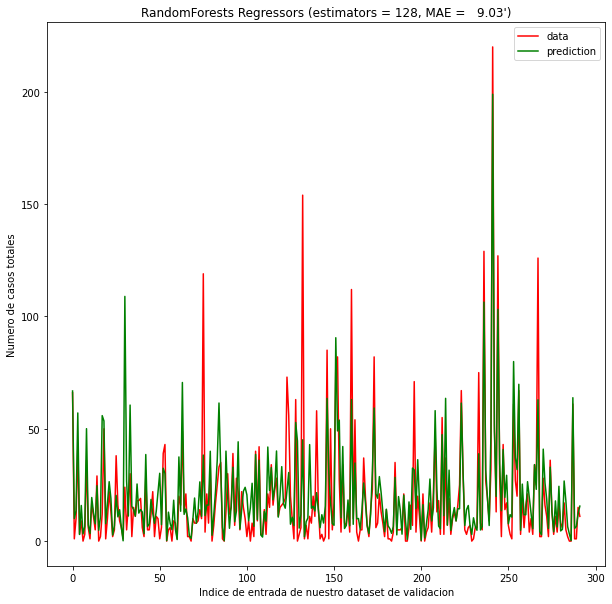

MAE 9.032788420376713


In [106]:

from sklearn.metrics import mean_absolute_error

                    
# x axis for plotting
import numpy as np
xx = np.stack(i for i in range(validationRF['total_cases'].shape[0]))
plt.plot(xx, validationRF['total_cases'], c='r', label='data')
plt.plot(xx, y_pred, c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.title("RandomForests Regressors (estimators = %i, MAE = %6.2f')" % (best_est, mae))
plt.ylabel("Numero de casos totales")
plt.xlabel("Indice de entrada de nuestro dataset de validacion")
plt.show()
print ('MAE', mae)

## Comparacion entre modelos, y modelado final
* ¿existe alguna forma rapida de mirar el overfitting?
* ¿he hecho cross-validation con todos? si no, es rapido hacerlo "centralizado"?
* No he hecho cross-validation prediction, deberia hacerlo para el final ?Justificacion teorica?
* Los plots son un calco de los del teacher, darles personalidad? por ejemplo usar colores del BaselFC, estan to guapos, y doradito para algun detalle como las hlines?
* NO has mirado regresion con SVM, sudas?
* Repetir todo con splits hechos con cv = timeseries.split? afecta esto a la cross-validation o se hace exactamente igual?


In [113]:
print(f"MAE decisio_tree best model obtained: {round(maeDecision_tree, 2)}")
print(f"MAE random forest best model obtained: {round(maeRandom_forest, 2)}")
print(f"MAE KNN best model obtained: {round(mae_KNN, 2)}")

MAE decisio_tree best model obtained: 11.62
MAE random forest best model obtained: 9.03
MAE KNN best model obtained: 13.42


Vamos a realizar, sobre el modelo y los hiperparametros elegidos, un ajuste y una prediccion sobre el archivo test.
Modelo final a usar:
* Random Forest
* n_estimators = 128 (nº de arboles)
* criterion 'absolute error'
* Data de entrenamiento = train_original con las selected features que se muestran a continuacion
* Data a predecir: test (no sabemos el resultado de la variable objetivo sobre este dataset)

In [108]:
selectedFeatures

array(['year', 'weekofyear', 'ndvi_se', 'ndvi_sw',
       'reanalysis_air_temp_k', 'reanalysis_avg_temp_k',
       'reanalysis_specific_humidity_g_per_kg', 'station_avg_temp_c',
       'station_min_temp_c'], dtype=object)

In [109]:
#Dataset final a utilizar
trainRF = train_original[np.append(selectedFeatures, "total_cases")] #with tarjet feature
trainRF.reset_index(drop = True, inplace = True)
#KNN fit
# constructor
regressorFinal =  RandomForestRegressor(n_estimators= 128, criterion='absolute_error', 
                                   random_state=42)
# Obtencion del modelo final
regressorFinal.fit( X = trainRF.drop(['total_cases'], axis=1), y = trainRF['total_cases'])


RandomForestRegressor(criterion='absolute_error', n_estimators=128,
                      random_state=42)

# Generando fichero de salida
* Necesitamos calcular la prediccion sobre el dataset de test
* Para ello necesitamos transformar como corresponda el dataset de test
* Usaremos el modelo final, entrenado con el dataset **total = train_original**

In [116]:
#X_test tiene que ser el dataset test pero en el formato de acuerdo al modelo final, si hay que eliminar columnas, hacerlo en X_test
#Xtest ha de tener la misma forma que trainKNN
display_side_by_side(trainKNN.head(), test[selectedFeatures].head())
#transformaciones a test para que sea como trainKNN, en este caso solo corresponde a eliminar las columnas que no se usan.
X_test = test[np.append(selectedFeatures, "city")] # requerimos de esta variable, no para la prediccion sino para obtener el csv en el formato de la compe
trainRF.reset_index(drop = True, inplace = True)

year 
 weekofyear 
 ndvi_se 
 ndvi_sw 
 reanalysis_air_temp_k 
 reanalysis_avg_temp_k 
 reanalysis_specific_humidity_g_per_kg 
 station_avg_temp_c 
 station_min_temp_c 
 total_cases 
 
 
 
 
 0 
 2002 
 46 
 0.209514 
 0.162029 
 297.165714 
 298.021429 
 17.907143 
 27.600000 
 21.4 
 18 
 
 
 1 
 1994 
 50 
 0.095500 
 0.192925 
 298.624286 
 298.742857 
 15.327143 
 26.585714 
 21.7 
 149 
 
 
 2 
 1992 
 27 
 0.169329 
 0.168471 
 300.177143 
 300.378571 
 17.667143 
 29.228571 
 25.6 
 31 
 
 
 3 
 1995 
 18 
 0.214543 
 0.157971 
 298.788571 
 299.071429 
 15.617143 
 27.842857 
 22.2 
 5 
 
 
 4 
 2007 
 41 
 0.118129 
 0.126343 
 300.790000 
 300.942857 
 18.375714 
 28.128571 
 23.9 
 135 
 
 
 
 
 
 
 year 
 weekofyear 
 ndvi_se 
 ndvi_sw 
 reanalysis_air_temp_k 
 reanalysis_avg_temp_k 
 reanalysis_specific_humidity_g_per_kg 
 station_avg_temp_c 
 station_min_temp_c 
 
 
 
 
 0 
 2008 
 18 
 0.102729 
 0.091200 
 298.492857 
 298.550000 
 15.918571 
 26.528571 
 21.7 
 
 
 1 
 2008 
 19 
 0.082043 
 0.072314 
 298.475714 
 298.557143 
 15.791429 
 26.071429 
 22.2 
 
 
 2 
 2008 
 20 
 0.151083 
 0.091529 
 299.455714 
 299.357143 
 16.674286 
 27.928571 
 22.8 
 
 
 3 
 2008 
 21 
 0.124329 
 0.125686 
 299.690000 
 299.728571 
 15.775714 
 28.057143 
 24.4 
 
 
 4 
 2008 
 22 
 0.062267 
 0.075914 
 299.780000 
 299.671429 
 16.137143 
 27.614286 
 23.3

In [117]:
#Tras elegir el modelo final, realizar un model.fit con todos los datos de test

y_pred = regressorFinal.predict(X_test[selectedFeatures])
print(y_pred)
# round the result and cast to int
import numpy as np
y = np.rint(y_pred) # round
y = y.astype(int) # cast to int
res = np.hstack(y)
print(res)
y_pred_no_neg = res.copy()
y_pred_no_neg[y_pred < 0] = 0
print(y_pred_no_neg)

[ 4.359375    5.1484375   5.9921875  10.078125    9.40625    13.40625
 11.7265625  17.859375   29.671875   23.09375    17.82421875 24.0234375
 37.4609375  37.734375   67.875      70.5078125  55.9609375  60.9140625
 73.7734375  81.40625    77.1171875  29.734375   22.53125    65.0625
 27.0234375  19.5234375  28.8359375  36.4375     27.5234375  22.7578125
 25.46875    19.6171875  16.4921875  14.6015625  12.9765625  13.171875
 15.1875     15.296875   14.3515625  14.9375     12.8984375  14.625
 12.296875   11.015625    6.125       7.21875     4.546875    4.125
  4.1171875   3.1953125   4.609375    6.3125      6.3203125   6.6640625
  4.203125    3.8515625  10.3359375   8.1875     10.5078125  16.46875
 15.75       32.9609375  39.84375    41.7265625  44.5625     50.71875
 55.125      59.1953125  55.015625   62.9140625  59.6171875  58.03125
 72.65625    67.734375   72.625      65.984375   66.875      69.265625
 45.8984375  34.265625   27.5234375  28.5390625  22.6953125  23.65625
 15.5546875  17

In [118]:
# generate output
output = pd.DataFrame({ 'city': X_test['city'], 'year': X_test['year'], 'weekofyear': X_test['weekofyear'], 
                       'total_cases': y_pred_no_neg})


from google.colab import files

with open('result.csv', 'w') as f:
  output.to_csv(f,  index = False)
  

files.download('result.csv')

output.head()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,city,year,weekofyear,total_cases
0,sj,2008,18,4
1,sj,2008,19,5
2,sj,2008,20,6
3,sj,2008,21,10
4,sj,2008,22,9


# Conclusiones sobre el presente trabajo de aprendizaje supervisado
Hay varios detalles que quiero remarcar:
No he utilizado al final los datos normalizados, por ninguno de los 2 algoritmos normalizadores indicados en la seccion en cuestion, esto se debe a diferentes causas relacionadas con mi lectura del siguiente [link](https://empresas.blogthinkbig.com/precauciones-la-hora-de-normalizar/):
* Carencia de conocimiento experto no-modelizable, acerca del buen o mal comportamiento de los modelos testeados con respecto a la/s normalizacion/es
* Fiabilidad del dataset: al desconocer de como de fiable es la informacion del dataset, no me atrevo a utilizar datos normalizados ya que esta en muchas ocasiones amplifica el ruido (tal y como se explica en el link)
* La normalizacion es un factor mucho menos representativo que la correcta eleccion de modelos para el tema en cuestion; sobre lo cual desconozco que haber comparado KNN, Decision Tree y Random Forest fuera lo mas *optimo*

Siguiendo con lo anterior, mejorias al trabajo podrian ser:
+ Incorporacion de otros modelos regresivos, como SVM para la regresion, que aunque no es su funcion mas comun, en ciertos problemas parece que se usan
+ Optar por modelos mixtos mezclados, con lo que ello implica: optimizacion de hiperparametros (con grid scaning o similar de forma multiple), pesar los modelos a usar sobre el total, explorar otros tipos de mediciones de bondad de los modelos...


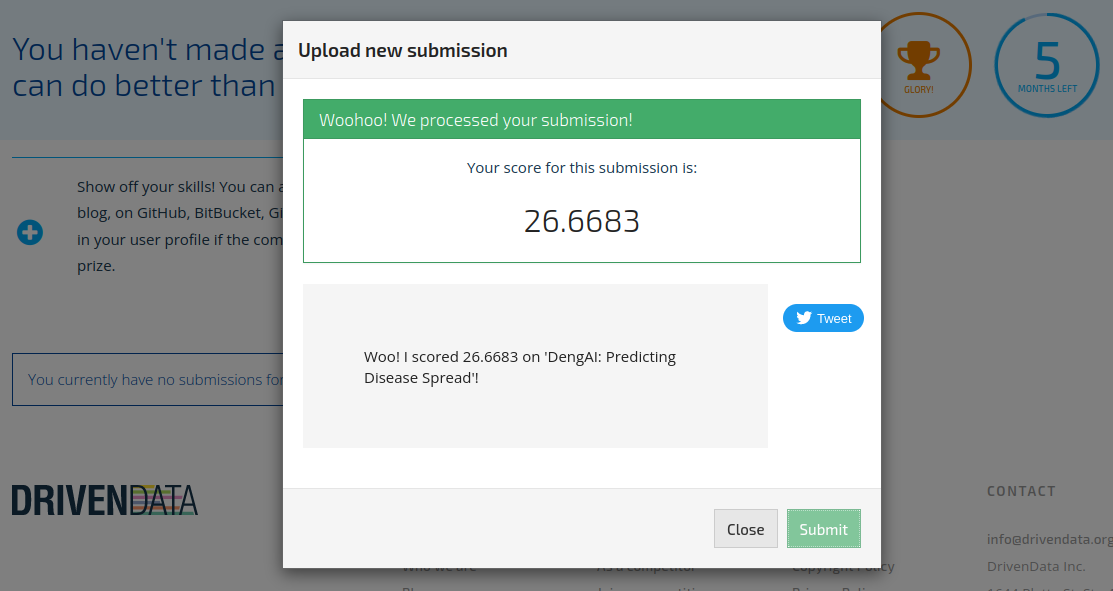

In [120]:
Image(filename='/content/drive/MyDrive/Colab Notebooks/Colabs MBID/imagesForColabs/ResultCompDengue.png') 